<a href="https://colab.research.google.com/github/Sarder-Iftekhar/Deep-Learning-Image-Processing-/blob/main/ResNet(final_A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:
import tensorflow as tf
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir =  '/content/drive/MyDrive/Data_W_f'

In [ ]:
IMAZE_SIZE = 224
BATCH_SIZE = 128


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
     zoom_range=0.2,
      rotation_range =40,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)





train_set =train_datagen.flow_from_directory(
    base_dir,
    target_size = (224,224),
    batch_size = BATCH_SIZE,
    subset = 'training',
     class_mode='categorical' 
     
)



test_set = test_datagen.flow_from_directory(
    base_dir,
    target_size = (224,224),
    batch_size=BATCH_SIZE,
    subset = 'validation',
    shuffle=False,
    class_mode='categorical'
)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
#modify
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential 
from glob import glob


In [ ]:
IMAZE_SIZE = [224,224]
resnet = ResNet50(input_shape=IMAZE_SIZE+[3],weights='imagenet',include_top=False)
resnet.output


94781440/94765736 [==============================] - 0s 0us/step


<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
for layer in resnet.layers:
   layer.trainable=False

In [ ]:
#folders=glob("/content/drive/MyDrive/mangoleaf/")
#print(len(folders))


1


In [ ]:
x = Flatten()(resnet.output)
#prediction = Dense(9,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(x)
prediction = Dense(8,activation='softmax')(x)
model = Model(inputs=resnet.input,outputs=prediction)
#model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])                    

In [ ]:


history=model.fit(train_set,steps_per_epoch=len(train_set),epochs=100,batch_size=128,validation_data=test_set,validation_steps=len(test_set))

Epoch 1/100
25/25 [==============================] - 1077s 43s/step - loss: 7.2293 - accuracy: 0.1816 - val_loss: 2.8837 - val_accuracy: 0.2525
Epoch 2/100
25/25 [==============================] - 45s 2s/step - loss: 2.0972 - accuracy: 0.3028 - val_loss: 1.9090 - val_accuracy: 0.3125
Epoch 3/100
25/25 [==============================] - 45s 2s/step - loss: 1.5818 - accuracy: 0.3806 - val_loss: 1.5487 - val_accuracy: 0.4062
Epoch 4/100
25/25 [==============================] - 45s 2s/step - loss: 1.4812 - accuracy: 0.4397 - val_loss: 1.4666 - val_accuracy: 0.4338
Epoch 5/100
25/25 [==============================] - 45s 2s/step - loss: 1.4174 - accuracy: 0.4472 - val_loss: 1.6261 - val_accuracy: 0.3925
Epoch 6/100
25/25 [==============================] - 45s 2s/step - loss: 1.3852 - accuracy: 0.4888 - val_loss: 1.4331 - val_accuracy: 0.4050
Epoch 7/100
25/25 [==============================] - 45s 2s/step - loss: 1.3461 - accuracy: 0.4762 - val_loss: 1.4316 - val_accuracy: 0.4225
Epoch 8/10

In [ ]:
model.save("MResNet50Withclass8.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
train_loss,train_acc=model.evaluate(train_set)

25/25 [==============================] - 42s 2s/step - loss: 0.6322 - accuracy: 0.7747


In [ ]:
validation_loss,val_acc =model.evaluate(test_set)

7/7 [==============================] - 3s 386ms/step - loss: 0.8560 - accuracy: 0.7487


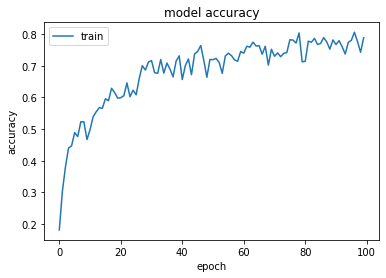

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

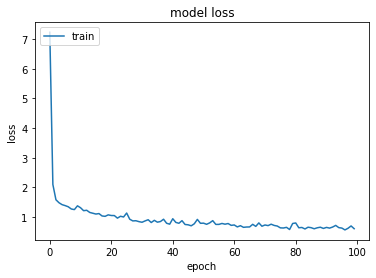

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()
plt.savefig('trainvsvalidloss.png')

In [ ]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
xc=range(100)
print(xc)

range(0, 100)


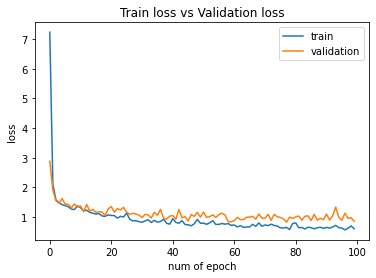

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of epoch')
plt.ylabel('loss')
plt.title('Train loss vs Validation loss')
plt.legend(['train','validation'])
plt.show()

plt.savefig('trainvsvalidloss.png')

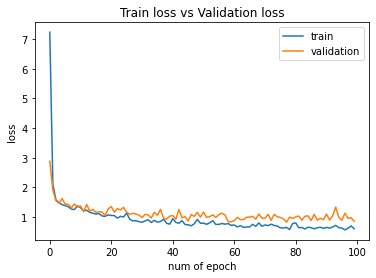

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of epoch')
plt.ylabel('loss')
plt.title('Train loss vs Validation loss')
plt.legend(['train','validation'])
plt.show()

plt.savefig('trainvsvalidloss.png')

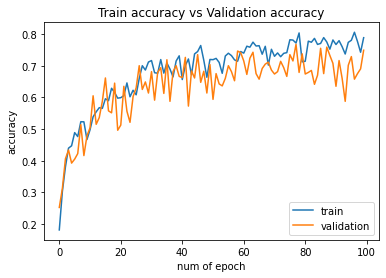

In [ ]:

plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy vs Validation accuracy')
plt.legend(['train','validation'], loc=4)
plt.savefig('trainvsvalidaccu.png')
plt.savefig('trainvsvalidacc.pdf')
plt.show()


In [ ]:
pip install sklearn

In [ ]:
import sklearn

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_fscore_support


In [ ]:
target_names = []

for key in train_set.class_indices:

    target_names.append(key)


print(target_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Confusion Matrix
[[45 25  0  3 11  5  9  2]
 [ 1 88  0  0  2  0  2  7]
 [ 0 12 88  0  0  0  0  0]
 [ 8  0  0 91  0  0  1  0]
 [ 5  8  0  0 64  3 18  2]
 [ 3  0  0  0  3 82 12  0]
 [ 1  0  0  0  0  0 97  2]
 [ 1 14  0  0  0  0 41 44]]


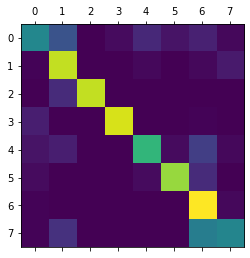

In [ ]:


Y_pred =model.predict(test_set)
y_pred = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_set.classes,y_pred)
print(cm)
plt.matshow(cm)


In [ ]:
print(classification_report(test_set.classes, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

     Anthracnose       0.70      0.45      0.55       100
Bacterial Canker       0.60      0.88      0.71       100
  Cutting Weevil       1.00      0.88      0.94       100
        Die Back       0.97      0.91      0.94       100
      Gall Midge       0.80      0.64      0.71       100
         Healthy       0.91      0.82      0.86       100
  Powdery Mildew       0.54      0.97      0.69       100
     Sooty Mould       0.77      0.44      0.56       100

        accuracy                           0.75       800
       macro avg       0.79      0.75      0.75       800
    weighted avg       0.79      0.75      0.75       800



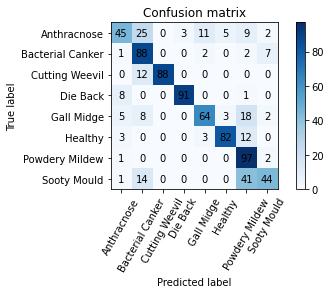

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width,height =cm.shape
    

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm,target_names)

plt.savefig('confusionMatrix.png')
plt.savefig('confusionMatrix.pdf')